Task 2: Malware API Call Histogram for Malware Classification

The goal of this challenge is to use multiway classification to predict the nine malware families in testing set using a model trained with the features from training data provided. This malware features dataset was built from malware samples provided by Abuse.ch. The malware features were extracted by dynamic analysis using the Cuckoo sandbox, the features consist of an API call count histogram. The dataset is split using an 80/20 split. __The label is contained in the first column of the training data. The API histogram represents 208 unique API calls and 9 unique malware families__. The following table gives the statistics of training and testing data for this task.

Dataset	File	Samples (Rows)	Dimension (Columns)
Training	train_features.txt	537	209 ( 1st column is the class label)
Testing	test_features.txt	134	208
Results Submission

You are required to submit one CSV file containing the prediction for testing sample. The expected result submission should be a CSV file that has 1 column (predicted label in the same definition as the training data class label) and 134 rows (No header line).

Citation of This Dataset

Paul Black, Malware API Call Histogram Dataset for the 13th International Cybersecurity Data Mining Competition (CDMC2022), Internet Commerce Security Laboratory (ICSL), Federation University Australia, 15/06/2022.

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import dtale as dt
%matplotlib inline

In [2]:
os.chdir("../")
os.getcwd()

'/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining'

In [3]:
os.chdir(os.getcwd())

In [12]:
dataset_loc='Dataset/'
print(dataset_loc+'Train/train_features.txt')
col_features= ['Label']+(['F'+str(i) for i in range(208)])

df= pd.read_csv(os.getcwd()+"/Dataset/Train/train_features.txt",header=None,names=col_features,dtype=int)
df


Dataset/Train/train_features.txt


,Label,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F198,F199,F200,F201,F202,F203,F204,F205,F206,F207
0,3,118,2,0,1,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,1,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,6,0,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,7,1702,54,117,287,7,0,2,556,0,...,0,0,0,0,0,0,0,0,0,0
533,7,0,0,0,1,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,0
534,3,150,2,0,1,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
535,5,8,0,0,0,0,0,0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
dt.show(df)

In [14]:
df_label= pd.DataFrame()
df_label['Label']= df['Label'].copy()
df=df.drop(columns=['Label'])
df_label,df

(     Label
 0        3
 1        1
 2        7
 3        5
 4        7
 ..     ...
 532      7
 533      7
 534      3
 535      5
 536      5
 
 [537 rows x 1 columns],
        F0  F1   F2   F3  F4  F5  F6   F7  F8  F9  ...  F198  F199  F200  F201  \
 0     118   2    0    1   0   0   0    4   0  35  ...     0     0     0     0   
 1       0   0    0    1   0   0   0    8   0   0  ...     0     0     0     0   
 2       0   0    0    1   0   0   0   16   0   0  ...     0     0     0     0   
 3       0   0    0    0   0   0   0    0   0   0  ...     0     0     0     0   
 4       6   0    0    2   0   0   0    1   0   0  ...     0     0     0     0   
 ..    ...  ..  ...  ...  ..  ..  ..  ...  ..  ..  ...   ...   ...   ...   ...   
 532  1702  54  117  287   7   0   2  556   0   0  ...     0     0     0     0   
 533     0   0    0    1   0   0   0   16   0   0  ...     0     0     0     0   
 534   150   2    0    1   0   0   0    4   0  35  ...     0     0     0     0   
 535     

/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning:

invalid value encountered in true_divide

/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning:

invalid value encountered in true_divide



Exception occurred while processing request: Object of type int64 is not JSON serializable
Traceback (most recent call last):
  File "/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/dtale/views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
  File "/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/dtale/views.py", line 3626, in network_data
    return jsonify(dict(nodes=nodes, edges=edges, groups=groups, success=True))
  File "/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/dtale/utils.py", line 627, in jsonify
    return _jsonify(return_data)
  File "/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/flask/json/__init__.py", line 301, in jsonify
    f"{dumps(data, indent=indent, separ

2022-07-11 14:14:13,457 - ERROR    - Exception occurred while processing request: Object of type int64 is not JSON serializable
Traceback (most recent call last):
  File "/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/dtale/views.py", line 120, in _handle_exceptions
    return func(*args, **kwargs)
  File "/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/dtale/views.py", line 3626, in network_data
    return jsonify(dict(nodes=nodes, edges=edges, groups=groups, success=True))
  File "/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/dtale/utils.py", line 627, in jsonify
    return _jsonify(return_data)
  File "/Users/teetusaini/Documents/Master_in_Web_science/GithubRepos/cssmining/Code/env_tensorflow/lib/python3.8/site-packages/flask/json/__init__.py", line 301, in jsonify
  

<AxesSubplot:>

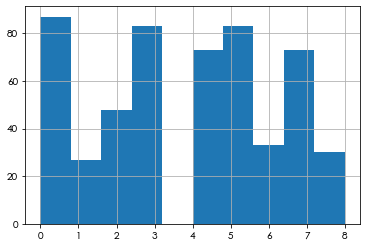

In [6]:
df_label['Label'].hist()

<AxesSubplot:>

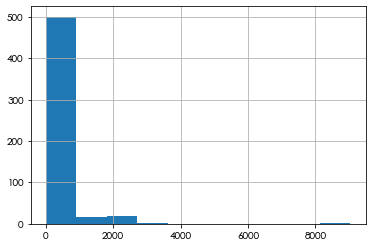

In [7]:
df['F0'].hist()

In [8]:
df['F1'].describe()

count      537.000000
mean        48.445065
std        829.677431
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      19176.000000
Name: F1, dtype: float64